In [4]:
import pandas as pd

In [14]:
df = pd.DataFrame({'A': ['high', 'medium', 'low'], 'B': [10, 20, 30]}, index=[0,1,2])

In [15]:
print(df)

        A   B
0    high  10
1  medium  20
2     low  30


In [17]:
df_with_dummies = pd.get_dummies(df, prefix='A', columns=['A'])
print(df_with_dummies)

    B  A_high  A_low  A_medium
0  10       1      0         0
1  20       0      0         1
2  30       0      1         0


In [53]:
from sklearn import datasets, preprocessing
import numpy as np

iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

std_scale = preprocessing.StandardScaler().fit(x)
x_std = std_scale.transform(x)

minmax_scale = preprocessing.MinMaxScaler().fit(x)
x_minmax = minmax_scale.transform(x)

print('Mean before Standardization: petal lengh={:.1f}, petal width={:.1f}'.format(x[:,0].mean(), x[:,1].mean()))
print('SD before standardization: petal lengh={:.1f}, petal width={:.1f}'.format(x[:,0].std(), x[:,1].std()))
print('Mean after stabdardization: petal lengh={:.1f}, petal width={:.1f}'.format(x_std[:,0].mean(), x_std[:,1].mean()))
print("SD after standardization: petal lengh={:.1f}, petal width={:.1f}".format(x_std[:,0].std(), x_std[:,1].std()))
print("Min value before min-max: petal lengh={:.1f}, petal width={:.1f}".format(x[:,0].min(), x[:,1].min()))
print('Max value before min-max petal lengh={:.1f}, petal width={:.1f}'. format(x[:,0].max(), x[:,1].max()))
print("Min value after min-max: petal lengh={:.1f}, petal width={:.1f}".format(x_minmax[:,0].min(), x_minmax[:,1].min()))
print('Max value after min-max petal lengh={:.1f}, petal width={:.1f}'. format(x_minmax[:,0].max(), x_minmax[:,1].max()))


Mean before Standardization: petal lengh=3.8, petal width=1.2
SD before standardization: petal lengh=1.8, petal width=0.8
Mean after stabdardization: petal lengh=-0.0, petal width=-0.0
SD after standardization: petal lengh=1.0, petal width=1.0
Min value before min-max: petal lengh=1.0, petal width=0.1
Max value before min-max petal lengh=6.9, petal width=2.5
Min value after min-max: petal lengh=0.0, petal width=0.0
Max value after min-max petal lengh=1.0, petal width=1.0


In [69]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#let's convert it to DataFrame
iris = pd.DataFrame(np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])

#replace the values with the class label
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species == 1.0, 'versicolo', 'virginnca'))

#let replace space in column name with -
iris.columns = iris.columns.str.replace(' ', '-')

print(iris['species'].value_counts())
iris.describe()

setosa       50
versicolo    50
virginnca    50
Name: species, dtype: int64


,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


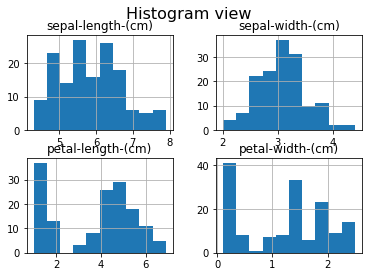

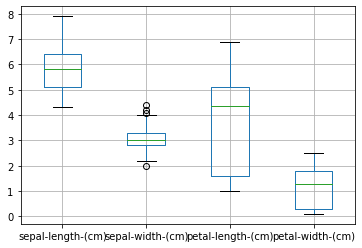

In [78]:
#ploting the values

plt.figsize = (15, 8)
iris.hist()
plt.suptitle('Histogram view', fontsize=16)

plt.show()

iris.boxplot()

plt.show()

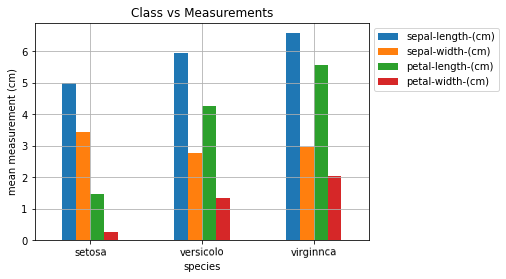

In [107]:
# MULTIVARIATE ANALYSIS
# print the mean for each column by species

iris.groupby(by='species').mean()

# plot for mean of each feature for each label class
iris.groupby(by='species').mean().plot(kind='bar')
plt.title("Class vs Measurements")
plt.xticks(rotation=1)
plt.grid(True)
plt.ylabel("mean measurement (cm)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

                   sepal-length-(cm)  sepal-width-(cm)  petal-length-(cm)  \
sepal-length-(cm)           1.000000         -0.117570           0.871754   
sepal-width-(cm)           -0.117570          1.000000          -0.428440   
petal-length-(cm)           0.871754         -0.428440           1.000000   
petal-width-(cm)            0.817941         -0.366126           0.962865   

                   petal-width-(cm)  
sepal-length-(cm)          0.817941  
sepal-width-(cm)          -0.366126  
petal-length-(cm)          0.962865  
petal-width-(cm)           1.000000  


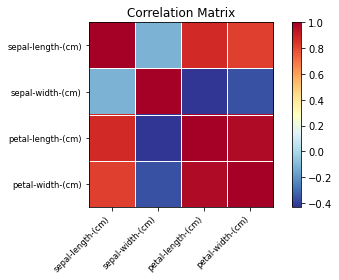

In [109]:
# print the correlation of the values
corr = iris.corr()
print(corr)

import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()